In [81]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [82]:
dm0 = 0                                      #pc-cm^-3

Nchan = 2048 #840
epsilon = 1.25
alpha = 1.0/(16+Nchan**2)
nu = (1.28+1.53)/2# 1.352# #                 #GHz
B = (1.53-1.28)/Nchan * 1000 #340/Nchan#     #MHz
ti = 40.0                                    #us
tscat = 0                                    #us
tsamp = 131 #64 #                            #us
beta = ti**2 + tscat**2 + tsamp**2           #us^2
# print(B, beta, alpha)

In [83]:
dm_prev = dm0
dms = [dm0]
while (dm_prev < 2000):
    dm_prev = Nchan**2 * alpha * dm_prev + 4*np.sqrt(alpha*(epsilon**2 - Nchan**2 * alpha)*dm_prev**2 + alpha*beta*(epsilon**2 - 1)*((nu**3)/(8.3*B))**2)
    dms.append(dm_prev)
print("Number of trials = {}".format(len(dms)))

Number of trials = 1627


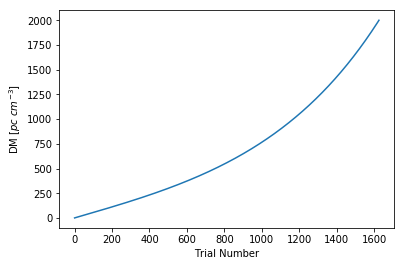

In [84]:
plt.plot(dms)
plt.xlabel("Trial Number")
plt.ylabel("DM [$pc\ cm^{-3}$]")
plt.show()

In [86]:
#########################################################
# Following a paper on Fast Dispersion Measure Transform
# https://arxiv.org/pdf/1411.5373.pdf
#########################################################

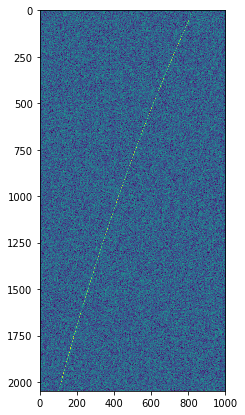

In [125]:
d = 4.15*2000
start_index = 100
max_time = 1000
C = np.random.uniform(size = (2048, max_time))
f1 = 1.53
for i in range(0, Nchan):
    f = (1.28 + (1.53 - 1.28)/Nchan*i)
#     print(np.floor(d*(-f1**(-2) + f**(-2))/(0.131*16)))
    if (start_index + int(d*(-f1**(-2) + f**(-2))/(0.131*16)) < max_time):
        C[i,start_index + int(d*(-f1**(-2) + f**(-2))/(0.131*16))] += 2.0
    C[i,:] = np.convolve(C[i,:], np.ones(3), "same")


        
plt.figure(figsize=(7,7))
# plt.axis((100,200, 2000,2048))
plt.imshow(C)

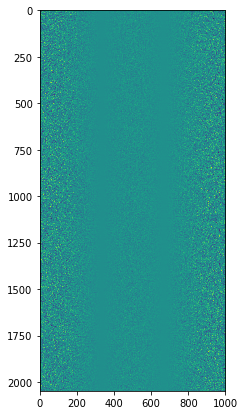

In [124]:
f = np.linspace(1.28, 1.53, 2048)
A = np.fft.fft(C)

plt.figure(figsize=(7,7))
# plt.axis((100,200, 2000,2048))
plt.imshow(np.imag(A))